# CPC MJO pentad data

In [2]:
#set up environment
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import datetime
import pandas as pd
import seaborn as sns
%matplotlib inline

Let's explore CPC's MJO pentad data. Data are available for download at: https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_mjo_index/proj_norm_order.ascii

In [3]:
mjo_file = 'https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_mjo_index/proj_norm_order.ascii'
mjo_df = pd.read_csv(mjo_file,delimiter='\s+',skiprows=1,parse_dates=['PENTAD'],index_col='PENTAD')
print(mjo_df.index)

DatetimeIndex(['1978-01-03', '1978-01-08', '1978-01-13', '1978-01-18',
               '1978-01-23', '1978-01-28', '1978-02-02', '1978-02-07',
               '1978-02-12', '1978-02-17',
               ...
               '2020-11-14', '2020-11-19', '2020-11-24', '2020-11-29',
               '2020-12-04', '2020-12-09', '2020-12-14', '2020-12-19',
               '2020-12-24', '2020-12-29'],
              dtype='datetime64[ns]', name='PENTAD', length=3139, freq=None)


# Create a Hovmoller diagram

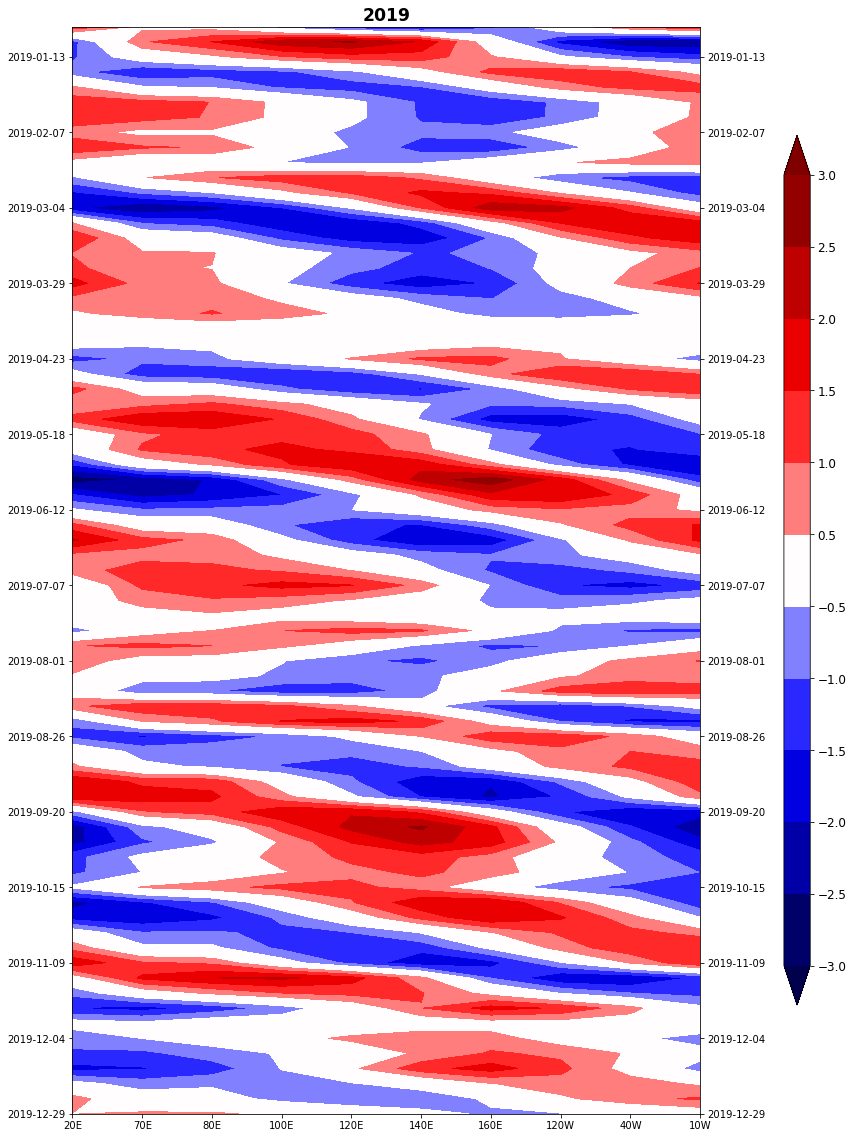

In [6]:
#select a year to plot
year = 2019

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(15,20))
p = ax.contourf(np.flipud(mjo_df[mjo_df.index.year==year].values),vmin=-3,vmax=3,extend='both',cmap=plt.get_cmap('seismic'),levels=[-3.,-2.5,-2.,-1.5,-1.,-0.5,0.5,1.,1.5,2.,2.5,3.])
ax.set_xticklabels(mjo_df.columns)
ax.set_yticks(np.arange(0,len(mjo_df[mjo_df.index.year==year].index.values),5))
ax.set_yticklabels(mjo_df[mjo_df.index.year==year].index.strftime('%Y-%m-%d')[::-1][::5])
ax.yaxis.set_ticks_position('both')
ax.tick_params(labeltop=False, labelright=True,labelleft=True)
ax.set_title(year,weight='bold',fontsize='xx-large')
colbar = plt.colorbar(p,pad=0.1,aspect=30,shrink=0.8,extend='both',ticks=[-3.,-2.5,-2.,-1.5,-1.,-0.5,0.5,1.,1.5,2.,2.5,3.])
colbar.ax.tick_params(labelsize='large')
plt.show()